# Analysis of Loan Approval Data

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
The high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features, by completing the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

4. Build and evaluate Gaussian Naive Bayes models with this datasets


## Load the dataset and show the basic information

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [4]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2072-09-17,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 

In [5]:
# 1. Remove all columns that have more than 50% of all values are missing

for column in data.columns:
    if data[column].isnull().sum() > len(data) * 0.5:
        data.drop(column, axis=1, inplace=True)

print(data.shape)

(20000, 35)


In [6]:
# 2. Remove every row that has at least one null value in a categorical column

categorical_columns = data.select_dtypes(exclude = ['number']).columns # Subset all catgorical columns

data = data.dropna(subset = categorical_columns)

print(data.shape)


(19900, 35)


At this stage, some numerical fields still contain mising values. This problem will be tackled using scikit-learn SimpleImputer. However, this step should be performed after splitting data into training and testing dataset inorder to avoid **data leakage**.

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [7]:
# 1. Remove all categorical columns whose values are all unique

column_to_drop = [] # This list holds the name of every columns to be dropped
for column in categorical_columns:
    if column in data.columns and data[column].nunique() == len(data[column]): # The first condition ensures that there will not be                                                      
                                                                               # any error when running this code the second time within one session
        column_to_drop.append(column)

for column in column_to_drop:
    if column in data.columns: # This condition ensures that there will not be any error when running this code the second time within one session
        data = data.drop(column, axis = 1)

In [8]:
numeric_columns = data.select_dtypes(include = ['number']).columns.tolist() # Subset all numerical columns before encoding
numeric_columns.remove('LoanApproved') ## exclude target from the list
print(numeric_columns)

['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio']


In [9]:
# 2. Apply one hot encoding to convert the categorical values into numerical ones.
data = pd.get_dummies(data)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19800 non-null  float64
 1   AnnualIncome                    19900 non-null  int64  
 2   CreditScore                     19900 non-null  int64  
 3   Experience                      19900 non-null  int64  
 4   LoanAmount                      19900 non-null  int64  
 5   LoanDuration                    19900 non-null  int64  
 6   NumberOfDependents              19900 non-null  int64  
 7   MonthlyDebtPayments             19900 non-null  int64  
 8   CreditCardUtilizationRate       19900 non-null  float64
 9   NumberOfOpenCreditLines         19900 non-null  int64  
 10  NumberOfCreditInquiries         19900 non-null  int64  
 11  DebtToIncomeRatio               19900 non-null  float64
 12  BankruptcyHistory               19900

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, split the dataset into training data and testing data, impute and rescale numrical columns.
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [10]:
X = data.drop(columns = 'LoanApproved', axis = 1)
y = data['LoanApproved']

In [11]:
# Randomly split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47477784)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape[0])
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape[0])

X_train shape:  (15920, 49)
y_train shape:  15920
X_test shape:  (3980, 49)
y_test shape:  3980


In [12]:
# Impute missing numerical values
imputer = SimpleImputer()
X_train[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = imputer.transform(X_test[numeric_columns])

In [13]:
#Rescaling numeric variables
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Use model to make prediction about testing data
y_test_pred = model.predict(X_test)

#Calculate testing accuracy based on y_test and y_test_pred
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy score on testing data: ", test_accuracy)

#Calculate testing f1-score based on y_test and y_test_pred
test_f1_score = f1_score(y_test, y_test_pred, average = 'binary')
print("f1-score for testing data: ", test_f1_score)

Accuracy score on testing data:  0.9678391959798995
f1-score for testing data:  0.9329842931937172


In [16]:
# Repeat the same process for calculating metrics on training data
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy score on training data: ", train_accuracy)
train_f1_score = f1_score(y_train, y_train_pred, average = 'binary')
print("f1-score on training data: ", train_f1_score)
print()

Accuracy score on training data:  0.9662060301507538
f1-score on training data:  0.9284764690241957



**The difference in accuracy scores between training and testing dataset is insignificant, implying that there is no overfitting in the model.** 

### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [17]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore all ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
accuracy_scores = []
f1_scores = []
estimator = LogisticRegression()
for n_features_to_select in range(1, X_train.shape[1]+1):
    rfe = RFE(estimator, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'binary')
    accuracy_scores.append(acc_score)
    f1_scores.append(f1)

In [18]:
# Find the highest accuracy score
highest_score = max(accuracy_scores)

# Find the index of the highest score
highest_score_index = accuracy_scores.index(highest_score)

print('The highest accuracy score:', highest_score)
print('The number of features required:', highest_score_index + 1)

The highest accuracy score: 0.9690954773869347
The number of features required: 22


In [19]:
# Repeat the same process for f1-score

# Find the highest f1-score
highest_f1 = max(f1_scores)

# Find the index of the highest f1-score
highest_f1_index = f1_scores.index(highest_f1)

print('The highest f1-score:', highest_f1)
print('The number of features required:', highest_f1_index + 1)
print()

The highest f1-score: 0.9356357927786499
The number of features required: 26



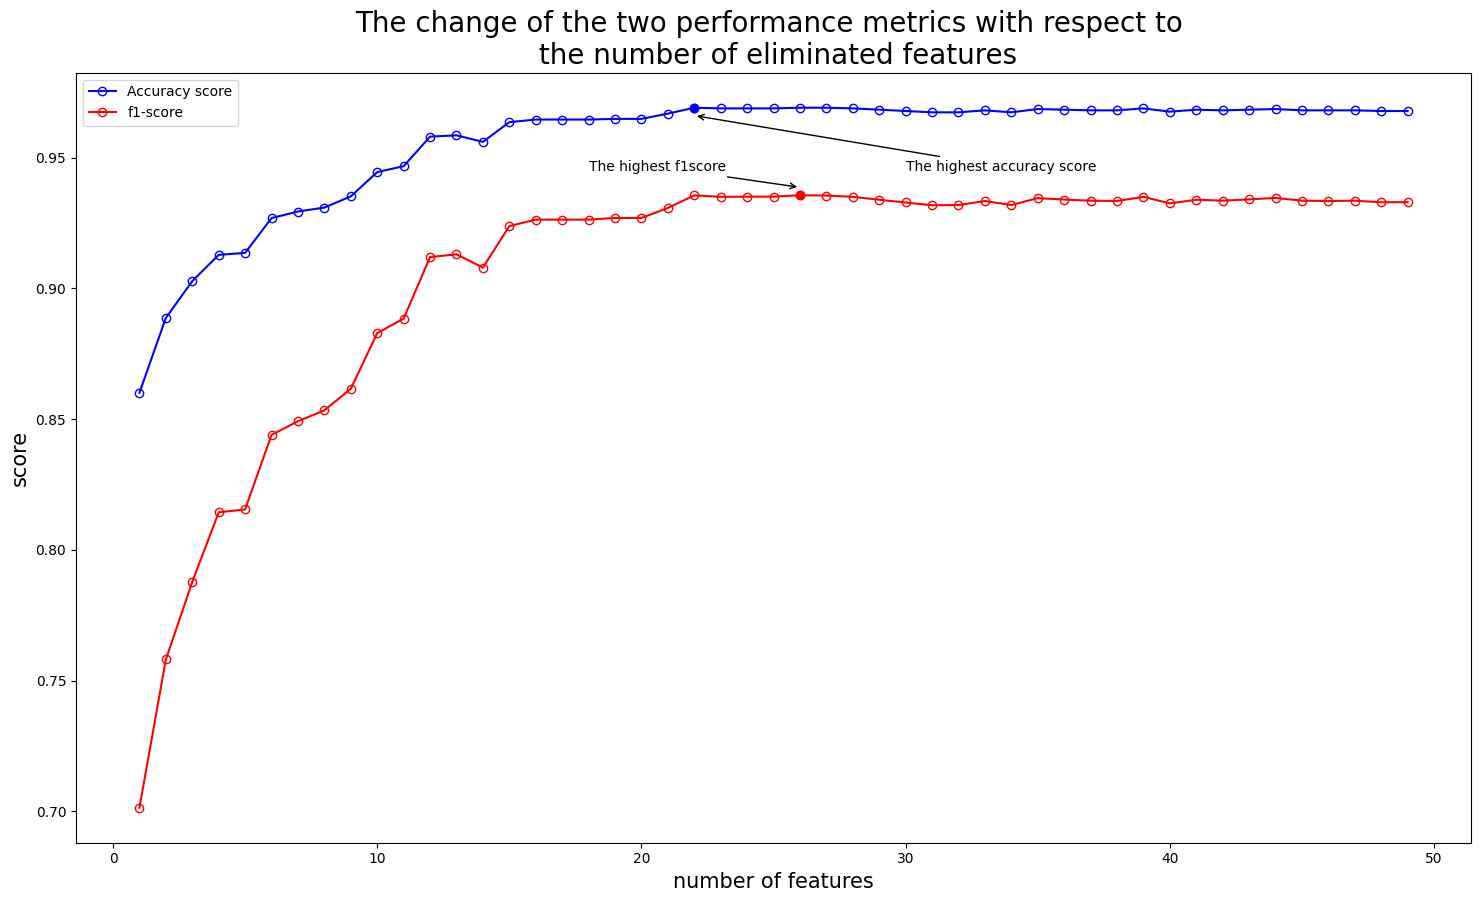

In [20]:
fig, ax = plt.subplots(figsize=(18,10))

# Plotting for accuracy scores
ax.plot(range(1, 50), accuracy_scores, marker = 'o', color = 'blue', markeredgewidth = 1 ,markeredgecolor = 'blue', markerfacecolor = 'None', label = 'Accuracy score')
ax.plot(highest_score_index + 1, highest_score, marker = 'o', markerfacecolor = 'blue', markeredgecolor = 'blue')
ax.annotate('The highest accuracy score',  xy=(highest_score_index + 1, highest_score - 0.003), xytext = (30, 0.945), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Plotting for f1-score
ax.plot(range(1, 50), f1_scores, marker = 'o', color = 'red', markeredgewidth = 1 ,markeredgecolor = 'red', markerfacecolor = 'None', label = 'f1-score')
ax.plot(highest_f1_index + 1, highest_f1, marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')
ax.annotate('The highest f1score',  xy=(highest_f1_index + 1, highest_f1 + 0.003), xytext = (18, 0.945), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Setting layout elements
ax.set_ylabel('score', size = 15)
ax.set_xlabel('number of features', size = 15)
ax.set_title('The change of the two performance metrics with respect to \n the number of eliminated features', size = 20)
ax.legend()

**We will choose 22 features to balance between model performance and features minimisation (two contrasting goals)**

In [21]:
chosen_num_features = 22
# Retrain the model with the chosen number of features

lr_model = LogisticRegression()
rfe = RFE(estimator = lr_model, n_features_to_select = chosen_num_features)
rfe.fit(X_train, y_train)

# Evaluate the model
y_test_pred = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_pred))
print("f1-score on test set: ", f1_score(y_test, y_test_pred, average = 'binary'))

accuracy score on test set:  0.9690954773869347
f1-score on test set:  0.9355683603981142


In [22]:
# Identify all retained features
selected_features_indices = [] # To hold the indices of selected features
for i in range(X_train.shape[1]):
    if rfe.support_[i] == True:
        selected_features_indices.append(i)

print('selected_indices:', selected_features_indices)
selected_features = X_train.columns[selected_features_indices].tolist() # All selected features
print('selected_features:', selected_features)

selected_indices: [0, 2, 4, 12, 13, 14, 15, 20, 23, 25, 27, 28, 29, 30, 31, 33, 34, 35, 40, 41, 42, 43]
selected_features: ['Age', 'CreditScore', 'LoanAmount', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'MonthlyIncome', 'NetWorth', 'InterestRate', 'TotalDebtToIncomeRatio', 'EmploymentStatus_Employed', 'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed', 'EducationLevel_Associate', 'EducationLevel_Doctorate', 'EducationLevel_High School', 'EducationLevel_Master', 'HomeOwnershipStatus_Mortgage', 'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own', 'HomeOwnershipStatus_Rent']


## Task 3: Build a K-Nearest Neighbors Classification Model

### Step 3.1 Build 1-NN classifier
1. Select the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [23]:
# Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
one_nn = KNeighborsClassifier(n_neighbors = 1)

# Subsetting the scaled training dataframe, using only selected 18 features
X_train_retained = X_train[selected_features] 
X_test_retained = X_test[selected_features]

# Fit the model and make prediction on testing data and trainig data
one_nn.fit(X_train_retained, y_train)
y_pred_test = one_nn.predict(X_test_retained)
y_pred_train = one_nn.predict(X_train_retained)

# Evaluation using testing data
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average = 'binary')
print('The accuracy score of testing data:', test_accuracy)
print('The f1-score of testing data:', test_f1_score)

# Evaluation using training data
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1_score = f1_score(y_train, y_pred_train, average = 'binary')
print('The accuracy score of training data:', train_accuracy)
print('The f1-score of training data:', train_f1_score)

The accuracy score of testing data: 0.8907035175879398
The f1-score of testing data: 0.762165117550574
The accuracy score of training data: 1.0
The f1-score of training data: 1.0


**The accuracy score of the training data is much higher than the one of the testing data. This implies that the model is overfitting**

### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [24]:
# 1. Use grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.

# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 31)}

# Initiate a GridSearchCV object
knn_cv = GridSearchCV(KNeighborsClassifier(), parameter_grid, scoring='accuracy', cv=5)

# Fit the model and extract the mean scores for testing dataset
knn_cv.fit(X_train_retained, y_train)
mean_test_scores = knn_cv.cv_results_['mean_test_score'].tolist()
print(mean_test_scores)

[0.884924623115578, 0.8820979899497488, 0.9032663316582914, 0.8965452261306532, 0.9097989949748744, 0.9046482412060302, 0.9130025125628141, 0.9057788944723619, 0.9135050251256281, 0.9074748743718594, 0.9149497487437186, 0.9082914572864322, 0.915640703517588, 0.9091708542713567, 0.9151381909547739, 0.9111809045226131, 0.9168341708542712, 0.9111180904522612, 0.916394472361809, 0.9112437185929648, 0.9172738693467337, 0.9123115577889447, 0.9173994974874372, 0.9126884422110553, 0.9164572864321607, 0.9113065326633165, 0.9162688442211054, 0.9125628140703519, 0.9167713567839197, 0.9128768844221107]


In [25]:
highest_score_gridsearch = max(mean_test_scores)
best_k = mean_test_scores.index(highest_score_gridsearch) + 1
print('The highest accuracy score:', highest_score_gridsearch)
print('The number of Ks required:', best_k)

The highest accuracy score: 0.9173994974874372
The number of Ks required: 23


Text(0.5, 1.0, 'The change of the accuracy score with respect to \n the number of K')

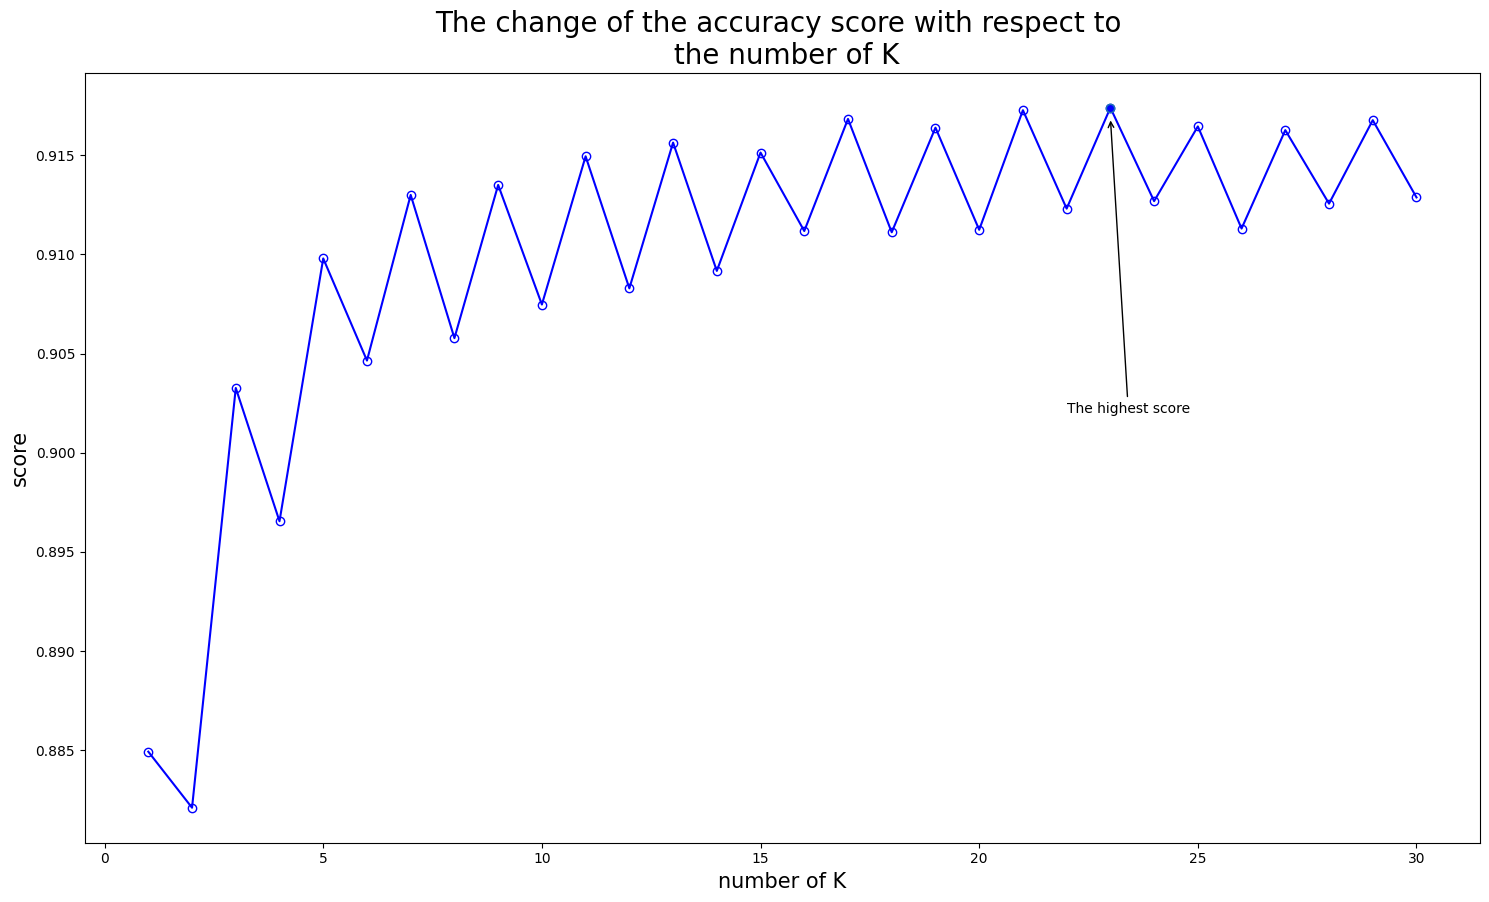

In [26]:
# Plot the accuracy mean test scores for every chosen number of k
fig, ax = plt.subplots(figsize = (18,10))
plt.plot(range(1,31), mean_test_scores,  marker = 'o', color = 'blue', markeredgewidth = 1 ,markeredgecolor = 'blue', markerfacecolor = 'None')
plt.plot(best_k, highest_score_gridsearch, marker = 'o', markerfacecolor = 'blue')
ax.annotate('The highest score',  xy=(best_k , highest_score_gridsearch-0.0005), xytext = (22, 0.902), arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.set_ylabel('score', size = 15)
ax.set_xlabel('number of K', size = 15)
ax.set_title('The change of the accuracy score with respect to \n the number of K', size = 20)

### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worst?

In [27]:
distance_metrics = ['euclidean', 'l1','cosine'] # chosen distance metric for training knn model
accuracy_scores_knn = [] # To store accuracy score for each distance metric
f1_scores_knn = [] # To f1-score for each distance metric
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors = best_k, metric = metric)
    knn.fit(X_train_retained, y_train)
    y_test_pred = knn.predict(X_test_retained)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_scores_knn.append(accuracy)
    f1 = f1_score(y_test, y_test_pred, average = 'binary')
    f1_scores_knn.append(f1)

In [28]:
# Display results in a tabular format
print()
print('Summary table of performance metrics')
print(pd.DataFrame({'distance metrics': distance_metrics, 'accuracy score': accuracy_scores_knn, 'f1-score': f1_scores_knn}))
print('\n \n')



Summary table of performance metrics
  distance metrics  accuracy score  f1-score
0        euclidean        0.922111  0.813702
1               l1        0.916583  0.798054
2           cosine        0.932663  0.851606

 



Text(0.5, 1.0, 'f1-scores for Different Distance Metrics')

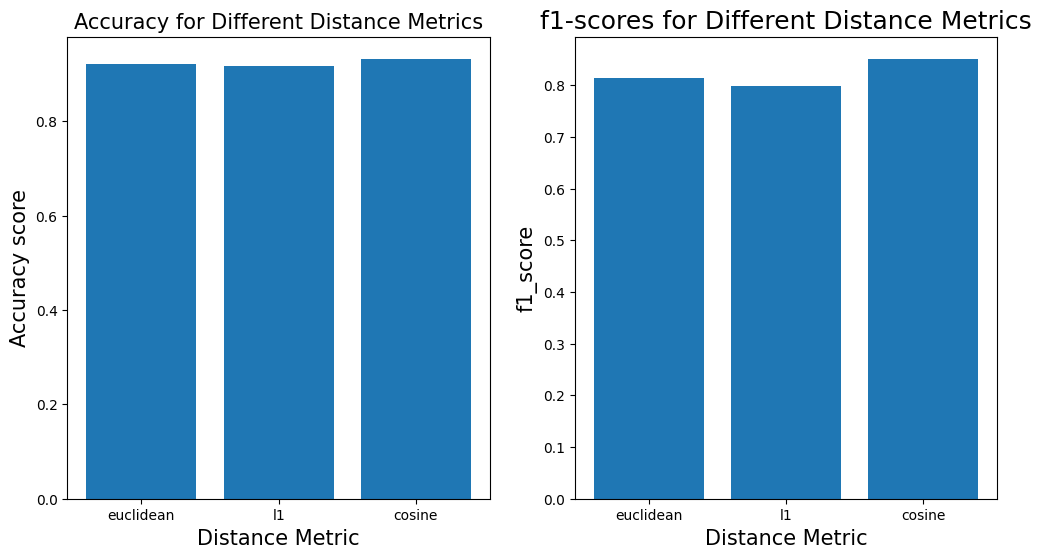

In [29]:
# Visualize the result
fig, ax = plt.subplots(1, 2, figsize = (12,6))

# Plotting accuracy scores for the 3 chosen distance metrics
ax[0].bar(distance_metrics, accuracy_scores_knn)
ax[0].set_xlabel('Distance Metric', size = 15)
ax[0].set_ylabel('Accuracy score', size = 15)
ax[0].set_title('Accuracy for Different Distance Metrics', size = 15)

# Plotting f1-scores for the 3 chosen distance metrics
ax[1].bar(distance_metrics, f1_scores_knn)
ax[1].set_xlabel('Distance Metric', size = 15)
ax[1].set_ylabel('f1_score', size = 15)
ax[1].set_title('f1-scores for Different Distance Metrics', size = 18)

Based on the two charts above, the distance metric "cosine" outperforms the other two distance metrics on both accuracy, and f1-score. Thus, it will be selected to train our final k-Nearest Neighbors model.

In [30]:
# Retrain the knn model with the best hyperparameters
knn_best = KNeighborsClassifier(n_neighbors = 23, metric = 'cosine')
knn_best.fit(X_train_retained, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=23)

In [31]:
## Evaluate the best model
y_pred_test = one_nn.predict(X_test_retained)
y_pred_train = one_nn.predict(X_train_retained)

# Evaluation using testing data
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average = 'binary')
print('The accuracy score of testing data:', test_accuracy)
print('The f1-score of testing data:', test_f1_score)

# Evaluation using training data
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1_score = f1_score(y_train, y_pred_train, average = 'binary')
print('The accuracy score of training data:', train_accuracy)
print('The f1-score of training data:', train_f1_score)

The accuracy score of testing data: 0.8907035175879398
The f1-score of testing data: 0.762165117550574
The accuracy score of training data: 1.0
The f1-score of training data: 1.0


## Task 4: Build a Naive Bayes classification model

In [32]:
# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X_train_retained, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test_retained)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'binary')
print("Testing accuracy is: ", accuracy)
print("Testing f1 is: ", f1)

Testing accuracy is:  0.9012562814070352
Testing f1 is:  0.8106024096385542


## Conclusion

By performing a comparative experiment with three classification models (Logistic Regression, k-Nearest Neighbors, and Gaussian Naive Bayes), combined with hyperparameters tuning to optimize models' performance, the highest-performing model is Logistic Regression model trained with 22 out of 49 number of features. **This model achieved the accuracy score of 0.97 and and the accuracy score of 0.94**.

The results of this loan approval prediction project have several important business implications for organizations involved in risk assessment and loan approval processes:

1. Improved Decision-Making Efficiency: The Logistic Regression model, achieving an accuracy of 97%, demonstrates its ability to effectively predict loan approval outcomes. By automating the decision-making process, organizations can significantly reduce the time and effort required to assess loan applications, allowing for faster approvals and better resource allocation.

2. Enhanced Risk Management: The model's precision in identifying high-risk applicants can help financial institutions mitigate potential loan defaults. By using predictive insights from the model, lenders can refine their risk assessment strategies, leading to more informed decisions and potentially lower default rates.